# Examples

In [3]:
import torch
from family_training import FamilyShapeSDFWrapper, load_wrapper_from_dir

In [4]:
wr = load_wrapper_from_dir("e70_l30_b5000_h300_lr0.0001/")


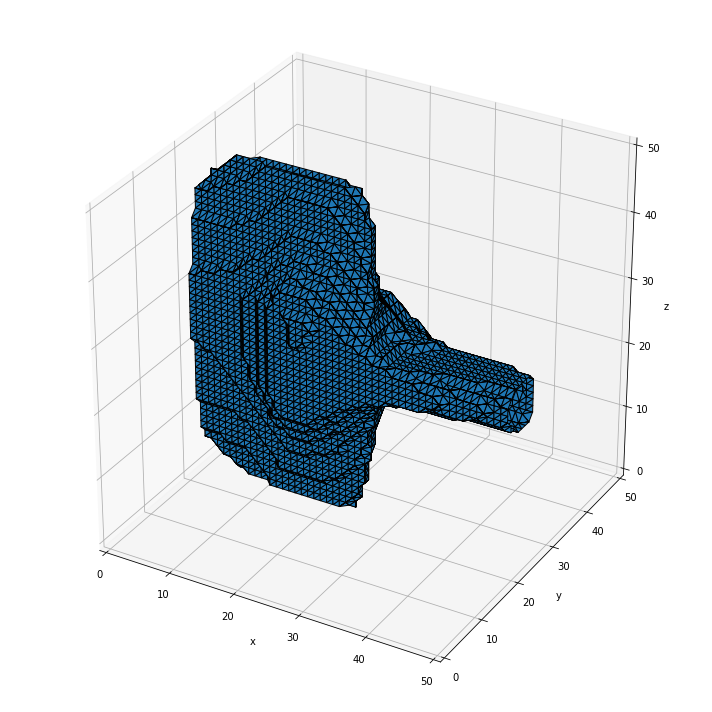

In [8]:
wr.visualize_id_marchingcubes(2)

In [ ]:
lat = wr.fit_latent_for_mesh(filepath='data/20.obj', n_epochs=100)

Loading mesh
Sampling points
Optimizing latent
Fit epoch 0, loss 0.1963408209849149
Fit epoch 1, loss 0.19067203160375357
Fit epoch 2, loss 0.18465684447437525
Fit epoch 3, loss 0.17936625960282981
Fit epoch 4, loss 0.1761491831857711
Fit epoch 5, loss 0.17381529603153467


In [ ]:
wr.visualize_latent_voxels(lat)

In [ ]:
wr.visualize_latent_marchingcubes(lat)

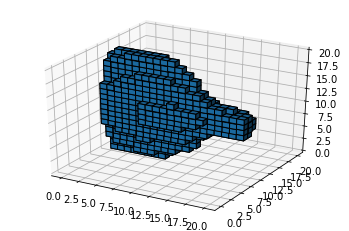

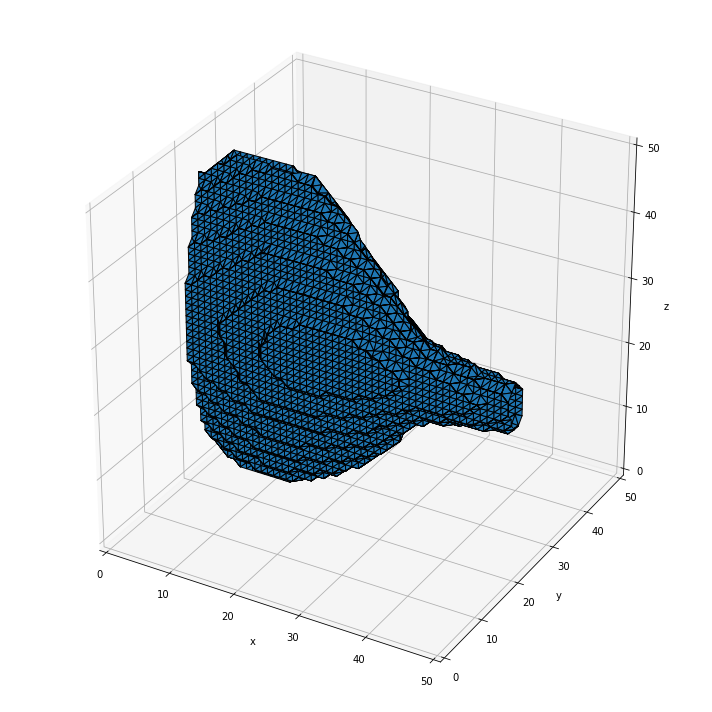

In [12]:
wr.visualize_latent_marchingcubes(lat)